#### Importation des modules nécessaires

In [10]:
import fenics as fe
import numpy as np

The L2 error is 0.005270898688904208


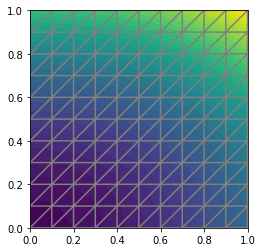

In [11]:
# Génération du maillage
mesh = fe.UnitSquareMesh(10, 10)

# Définition de l'espace de fonction (P = Lagrange)
V = fe.FunctionSpace(mesh, 'P', 1)

# Formulation variationnelle
u_test = fe.TestFunction(V)
u_trial = fe.TrialFunction(V)
f = fe.Constant(-6.0)
a = fe.dot(fe.grad(u_test), fe.grad(u_trial)) * fe.dx
L = f * u_test * fe.dx
ubar = fe.Expression('1 + pow(x[0], 2) + 2 * pow(x[1], 2)', degree=2)

# Conditions aux limites
bc = fe.DirichletBC(V, ubar, fe.DomainBoundary())

# Assemblage de la matrice et du vecteur de force
A = fe.assemble(a)
b = fe.assemble(L)

# Imposition des conditions aux limites (This gives an unsymmetric matrix A)
# bc.apply(A, b)
# Alternative method to assemble and impose bc obtaining a symmetric matrix
A, b = fe.assemble_system(a, L, bc)

# Résolution du système linéaire
u = fe.Function(V)
fe.solve(A, u.vector(), b, "gmres", "ilu")

# Affichage des résultats
fe.plot(u)
fe.plot(mesh)

# Sauvegarde de la solution au format VTK
vtkfile = fe.File("poisson_solution.pvd")
vtkfile << u

# Calcul de l'erreur en norme L2
error_L2 = fe.errornorm(ubar, u, 'L2')
print("The L2 error is", error_L2)